In [1]:
print('hello world!')

hello world!


In [2]:
url =  "https://en.wikipedia.org/wiki/Python_(programming_language)"

In [3]:
import requests

In [4]:
text = requests.get(url).content.decode('utf-8')

In [5]:
from html.parser import HTMLParser

In [7]:
# bu kod bloğu html tagleriyle birlikte daha anlamlı bir metin vererek kirliliği ortadan kaldıracak
class MyHTMLParser(HTMLParser): 
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

In [9]:
parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])   # textin ilk 100 karakterini yazdırma

  Python (programming language) - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History 2 Design philosophy and features 3 Syntax and semantics Toggle Syntax and semantics subsection 3.1 Indentation 3.2 Statements and control flow 3.3 Expressions 3.4 Methods 3.5 Typing 3.6 Arithmetic operations 4 Programming examples 5 Libraries 6 Development environments 7 Implementations Toggle Implementations subsection 7.1 Reference implementation 7.2 Other implementations 7.3 Unsupported implementations 7.4 Cross-compilers to other languages 7.5 Performance 8 Development 9 API do

In [10]:
import nlp_rake
# metinleri analiz etmemizi anlamlı sonuç bulmamızı sağlayan kütüphane

In [13]:
extractor = nlp_rake.Rake(max_words=2, min_freq=4, min_chars=5)   # min_freq, kullanma sıklığını ifade eder. min_chars, 5 karakter sınırı koyduk yani 5  karakterden küçük kelimeler gelmicek
res = extractor.apply(text)
res

[('standard library', 4.0),
 ('machine code', 4.0),
 ('style guide', 3.857142857142857),
 ("o'reilly media", 3.833333333333333),
 ('list comprehensions', 3.8),
 ('matrix multiplication', 3.8),
 ('scripting language', 3.8),
 ('assignment statement', 3.75),
 ('programming language', 3.6965517241379313),
 ('mixed types', 3.571428571428571),
 ('dynamic language', 3.5142857142857142),
 ('latest release', 3.375),
 ('programming languages', 3.2811671087533156),
 ('python code', 3.2527777777777778),
 ('python insider', 3.2527777777777778),
 ('version number', 3.076923076923077),
 ('language', 1.8),
 ('statement', 1.75),
 ('division', 1.6923076923076923),
 ('syntax', 1.6818181818181819),
 ('types', 1.5714285714285714),
 ('reference', 1.5555555555555556),
 ('block', 1.5555555555555556),
 ('expression', 1.5555555555555556),
 ('method', 1.5454545454545454),
 ('number', 1.5384615384615385),
 ('support', 1.5),
 ('design', 1.5),
 ('speed', 1.5),
 ('modules', 1.4444444444444444),
 ('object', 1.4285714

In [14]:
import matplotlib.pyplot as plt

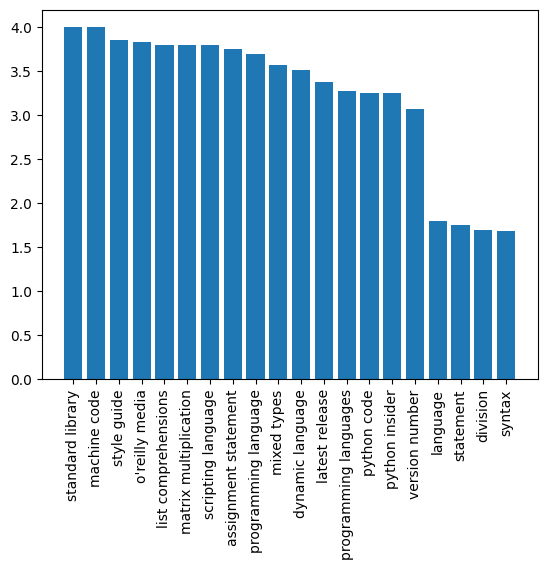

In [15]:
def plot(pair_list):
    pair_list = pair_list[:20]
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [16]:
from wordcloud import WordCloud
# öne çıkan kelimeleri bulmak için kullanırız

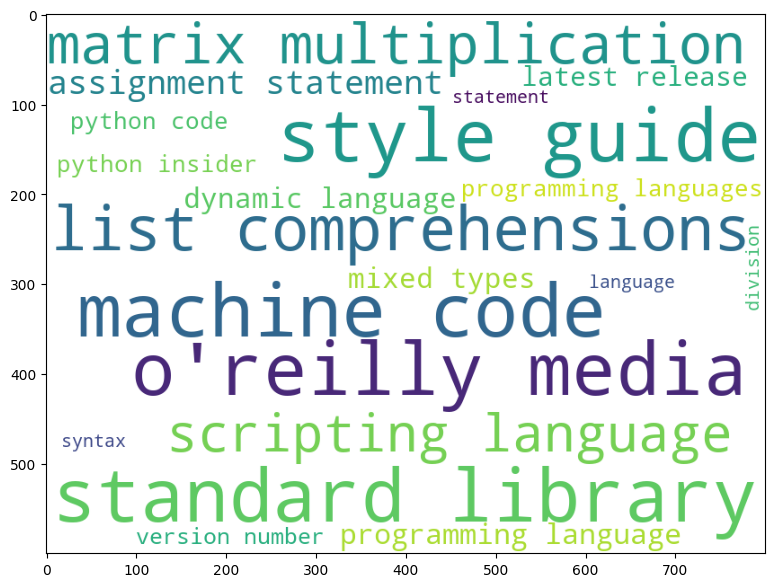

In [18]:
wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res[:20] }))
# textin ilk 20 kelimesine baktık

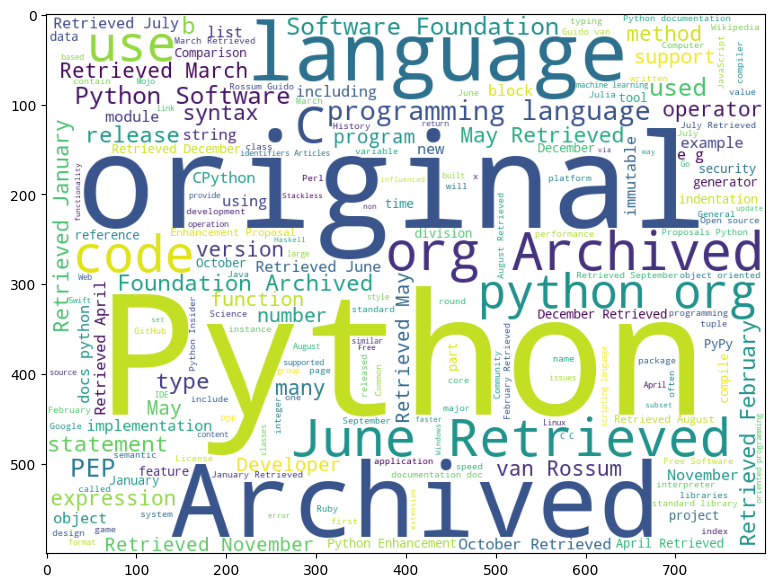

In [20]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
# tüm textteki kelimelere baktık